<a href="https://colab.research.google.com/github/manalisahu1707/manali2417/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # use for displaying image 
from google.colab import files

**Reading File Showing CV2 img** 

In [2]:
def read_file(filename): # defining the function with its name
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [3]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [4]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

**Upload Image File**

Saving WhatsApp Image 2022-11-20 at 23.48.48.jpg to WhatsApp Image 2022-11-20 at 23.48.48.jpg


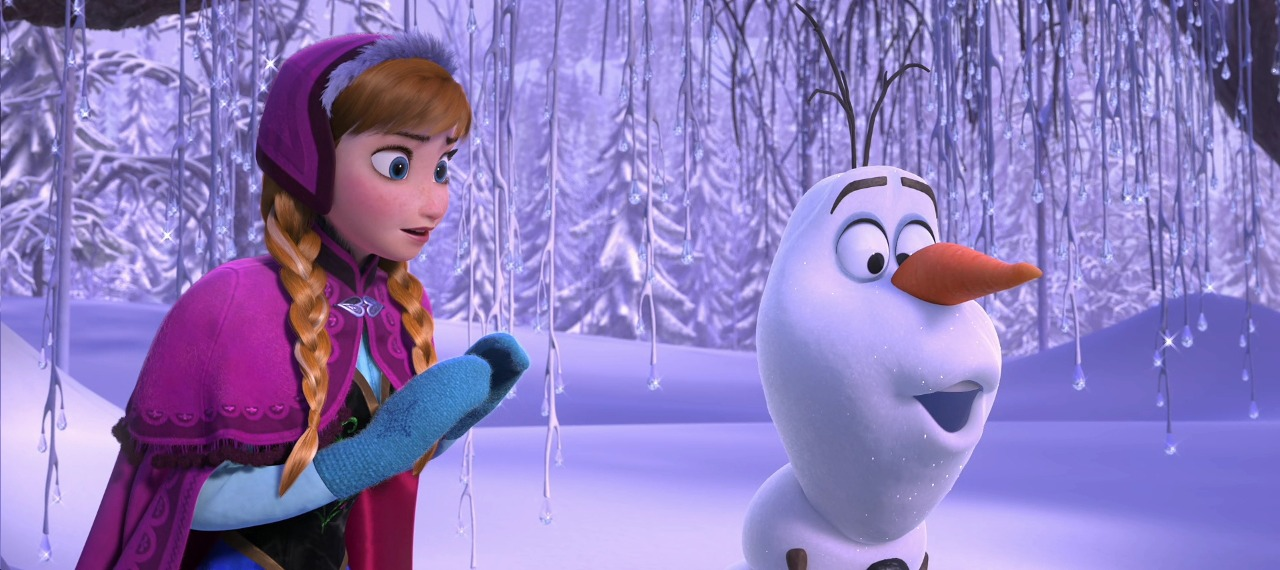

In [5]:
uploaded = files.upload()

filename = next(iter(uploaded))
img = read_file(filename)

**Run Code to Create Cartoon Effect**

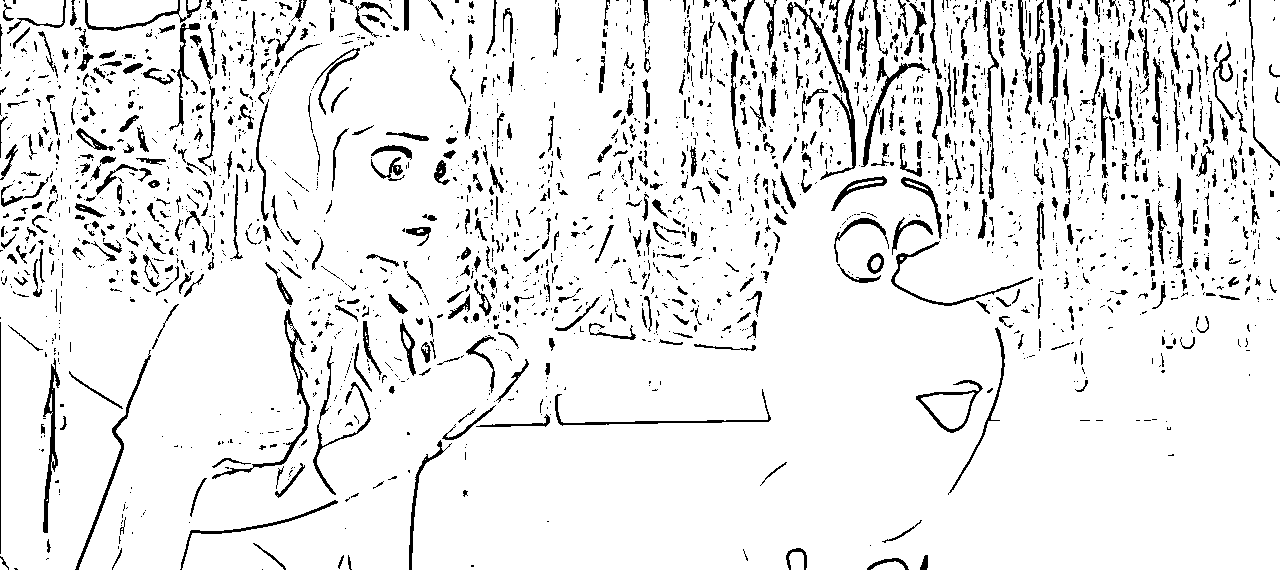

In [6]:
line_size = 7
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

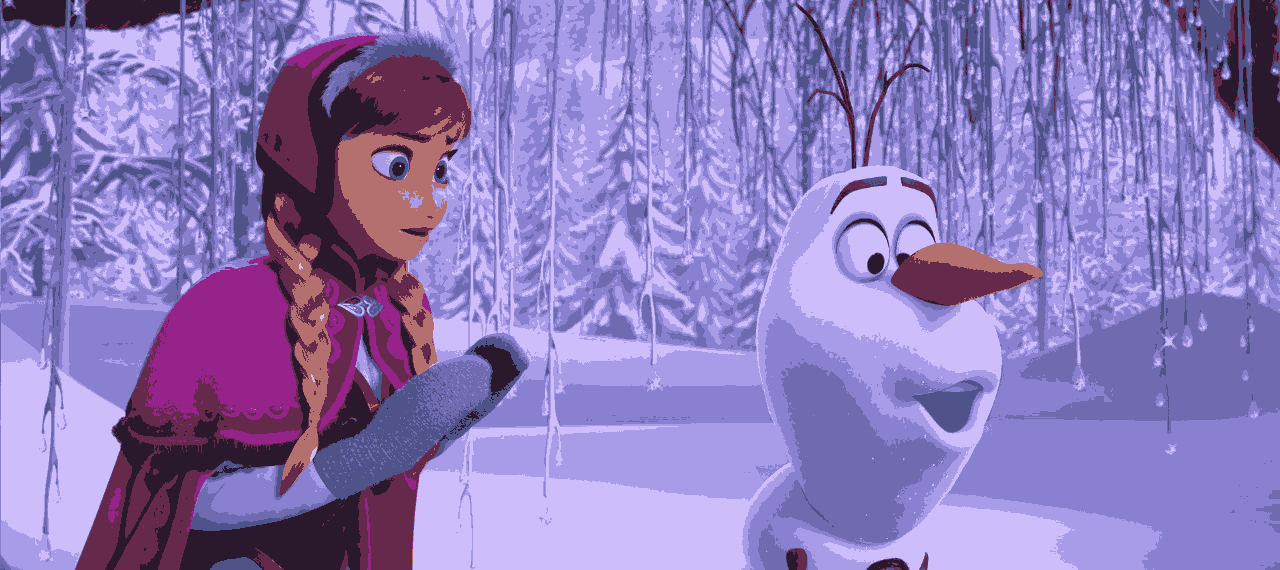

In [7]:
total_color = 9

img = color_quantization(img, total_color)
cv2_imshow(img)

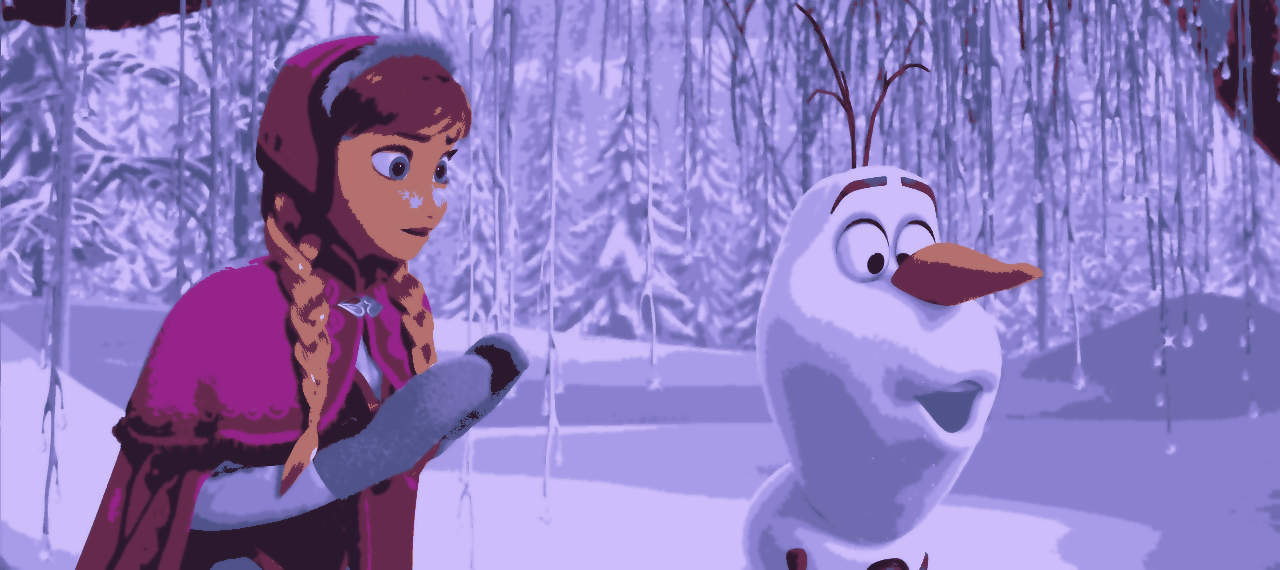

In [8]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=100,sigmaSpace=100)
cv2_imshow(blurred)

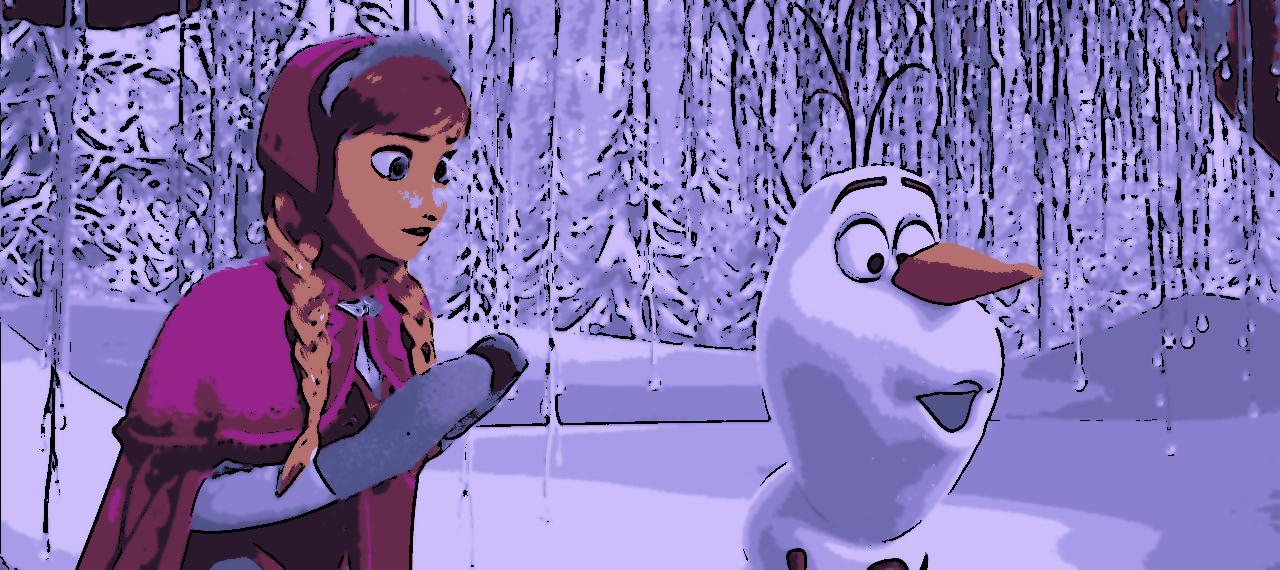

In [9]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)




***QR CODE SCANNER***

In [13]:
!pip install qrcode
import qrcode
from PIL import Image
logo = Image.open('/content/WhatsApp Image 2022-11-20 at 23.48.48.jpg')
basewidth =75
wpercent = (basewidth/float(logo.size[0]))  
hsize = int((float(logo.size[1])*float(wpercent)))
logo = logo.resize((basewidth,hsize),Image.ANTIALIAS)
qr_big=qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_H)
qr_big.add_data('https://ibb.co/ggkZ0F7')
qr_big.make()
img_qr_big=qr_big.make_image(fill_color='black',back_color='white').convert('RGB')
pos=((img_qr_big.size[0]-logo.size[0])//2,(img_qr_big.size[1]-logo.size[1])//2)

img_qr_big.paste(logo,pos)
img_qr_big.save('ss_qr.jpg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
